# Proof of Concept

Figures to recreate:
* Coverage vs. Atypicality Quantile - for any CP algorithm, data generation, and atypicality score setting 
* Efficiency vs. Atypicality (cut?)
* Proof of Concept (3x3) - for true atypicality
* Proof of Concept (3x3) - for predicted atypicality
* Distribution of True value in the interval

In [84]:
import sys
sys.path.append("../src")

from atypicality import compute_atypicality_scores
from data_generation_settings import generate_and_split_gaussian_data, generate_and_split_lognormal_data, generate_and_split_gmm_data
from fit_cp_models import fit_rf_cp_model, fit_gaussian_cp_model, fit_conformal_cp_model
from compute_bounds import evaluate_lambda_adjusted_interval_coverage
from compute_betas import compute_beta
from plotting import plot_coverage_across_atypicality_quantile, plot_betagrouped_by_atypicality

ImportError: cannot import name 'compute_beta' from 'compute_betas' (/Users/audreyxychang/Documents/GitHub/extending-atypicality/notebooks/../src/compute_betas.py)

# Calculating Coverage vs. Atypicality Quantile for any experimental setting

In [2]:
atypicality_settings = [
    ('logjointmvn_score', 0),
    ('logjointmvn_score', 0.5),
    ('logjointmvn_score', 1),
    ('gmm_score', 1)
]

# Run calibration across all atypicality types
coverage_by_quantile_lambda = evaluate_lambda_adjusted_interval_coverage(atypicality_settings, 
                                        make_and_split_data=generate_and_split_lognormal_data, 
                                        fit_cp_model=fit_rf_cp_model, 
                                        n_samples=500,
                                        n_splits=3, 
                                        true_atypicality=True,
                                        num_quantiles=5)

# Peek at output: coverage across atypicality score, quantile, split, and lambda
coverage_by_quantile_lambda.head(5)

/Users/audreyxychang/Documents/GitHub/extending-atypicality/notebooks/../src/data_generation_settings.py:66: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  Z = np.random.multivariate_normal(mean, cov, size=n_samples)
80it [00:00, 462.13it/s]
100it [00:00, 527.45it/s]
/Users/audreyxychang/Documents/GitHub/extending-atypicality/notebooks/../src/data_generation_settings.py:66: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  Z = np.random.multivariate_normal(mean, cov, size=n_samples)
80it [00:00, 278.48it/s]


100it [00:00, 379.12it/s]
80it [00:00, 522.65it/s]
100it [00:00, 530.68it/s]
80it [00:00, 368.39it/s]
100it [00:00, 334.19it/s]
80it [00:00, 519.09it/s]
100it [00:00, 529.62it/s]
80it [00:00, 349.11it/s]
100it [00:00, 375.43it/s]


,score,lambda,quantile,coverage,split
0,logjointmvn_score,0.0,0,1.00,0
1,logjointmvn_score,0.0,1,0.90,0
2,logjointmvn_score,0.0,2,0.80,0
3,logjointmvn_score,0.0,3,0.85,0
4,logjointmvn_score,0.0,4,0.55,0


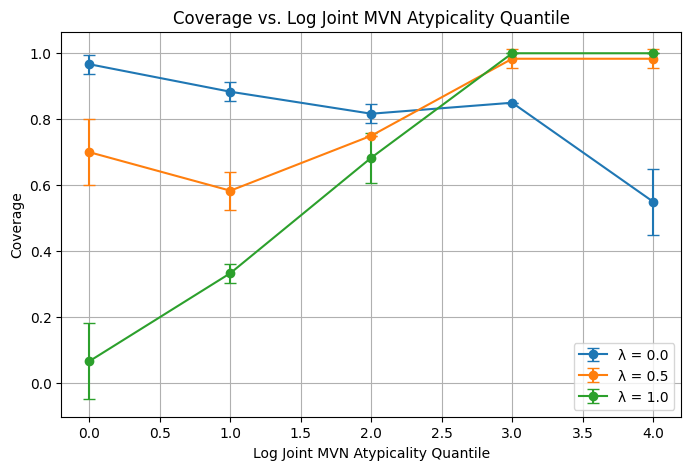

In [3]:
# Plot result for a specific score
plot_coverage_across_atypicality_quantile(df=coverage_by_quantile_lambda,
                                          atypicality_score = "logjointmvn_score",
                                          atypicality_score_title="Log Joint MVN",
                                          ylim_bottom=None,
                                          ylim_top=None,
                                          save=True)


# Calculate $\beta$ for 3x3 Using Atypicality

In [83]:
beta_df = compute_beta(true_atypicality=True, silent=True)
plot_betagrouped_by_atypicality(beta_df, "test")

NameError: name 'compute_beta' is not defined

In [19]:
import pandas as pd
beta_df = pd.DataFrame(beta_results)


In [20]:
beta_df

,Data Generation Setting,CP Model,Atypicality Score,Lambda,Mean Beta,Std Beta
0,generate_and_split_gaussian_data,fit_rf_cp_model,gmm_score,0,-0.016000,0.036297
1,generate_and_split_gaussian_data,fit_rf_cp_model,kde_score,0,-0.011000,0.025100
2,generate_and_split_gaussian_data,fit_rf_cp_model,knn_score,0,-0.014000,0.011937
3,generate_and_split_gaussian_data,fit_rf_cp_model,logjointmvn_score,0,-0.021000,0.024083
4,generate_and_split_gaussian_data,fit_gaussian_cp_model,gmm_score,0,0.020000,0.027386
5,generate_and_split_gaussian_data,fit_gaussian_cp_model,kde_score,0,0.044000,0.036640
6,generate_and_split_gaussian_data,fit_gaussian_cp_model,knn_score,0,0.034000,0.027249
7,generate_and_split_gaussian_data,fit_gaussian_cp_model,logjointmvn_score,0,0.032000,0.036332
8,generate_and_split_gaussian_data,fit_conformal_cp_model,gmm_score,0,-0.042000,0.007583
9,generate_and_split_gaussian_data,fit_conformal_cp_model,kde_score,0,-0.056000,0.029026


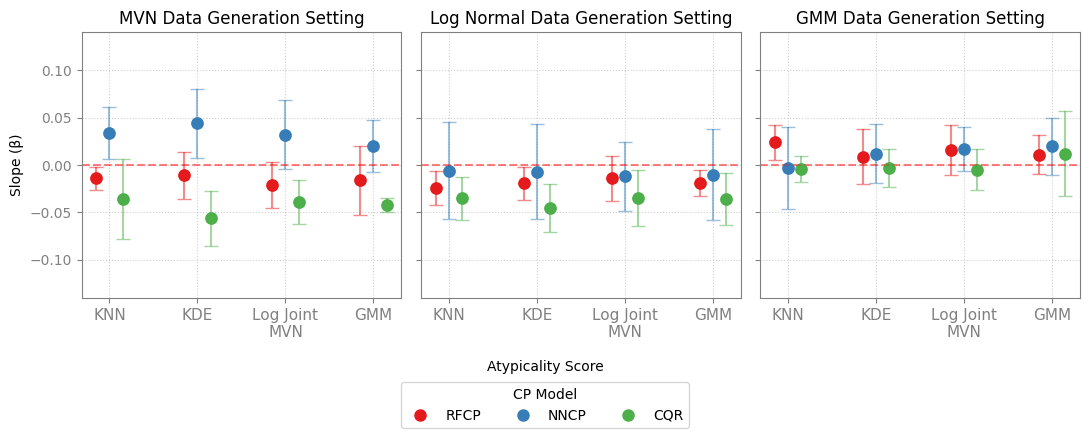